# Software Price Prediction Project


## Project Goal:

The goal of this project is to develop a predictive pricing model for enterprise SaaS products that balances the interests of both buyers and sellers. The model aims to ensure that buyers can secure a fair and budget-friendly price while sellers achieve reasonable revenue based on market conditions and product characteristics. The pricing model will consider various factors, including the feature set, user base, market position, customer satisfaction, competitor pricing, development costs, and desired profit margins, to generate a price that reflects both market reality and the unique value proposition of each product. The ultimate objective is to create a win-win pricing strategy that fosters long-term relationships between buyers and sellers in the competitive SaaS market.

## Load libraries

In [257]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import joblib



## Load Dataset

In [258]:
train_data_path=r"C:\Users\Lenovo-1\OneDrive\Desktop\Jazzee\dataset\train.csv"
test_data_path=r"C:\Users\Lenovo-1\OneDrive\Desktop\Jazzee\dataset\test.csv"

df_train=pd.read_csv(train_data_path)
df_test=pd.read_csv(test_data_path)

print("shape of df_train",df_train.shape)
print("shape of df_test",df_test.shape)

shape of df_train (240, 11)
shape of df_test (60, 11)


In [259]:
df_train.head()

,Product_ID,Product_Name,Feature_Set,User_Base,Market_Position,Customer_Satisfaction,Competitor_Price,Cost_to_Develop,Desired_Profit_Margin,Buyer_Budget,Price
0,P233,Product_233,10,4141,Niche,4.669860,56.812792,151376,0.673552,49.656010,61.177394
1,P060,Product_60,15,16338,Niche,4.787785,25.040816,226572,0.684748,21.103281,23.363731
2,P007,Product_7,16,1301,Mainstream,4.979920,115.728085,83320,0.791105,99.474866,114.707799
3,P186,Product_186,10,1728,Premium,4.599832,246.676164,246733,0.700513,208.214824,242.808291
4,P174,Product_174,16,8357,Premium,4.287999,35.732004,182130,0.738990,29.280414,37.899041


In [260]:
df_test.head()

,Product_ID,Product_Name,Feature_Set,User_Base,Market_Position,Customer_Satisfaction,Competitor_Price,Cost_to_Develop,Desired_Profit_Margin,Buyer_Budget,Price
0,P204,Product_204,18,2062,Niche,3.362871,162.613586,178335,0.730040,141.865443,149.624987
1,P267,Product_267,13,6645,Premium,3.711345,47.062576,165142,0.778417,39.715397,44.197341
2,P153,Product_153,10,1417,Mainstream,4.499921,275.316564,232958,0.679396,237.280955,276.096545
3,P010,Product_10,20,1699,Premium,3.509281,131.016368,152215,0.601513,115.099580,143.481010
4,P234,Product_234,25,2810,Premium,4.968804,136.007250,212962,0.682826,122.087711,127.536648


In [261]:
df=pd.concat([df_train,df_test])

In [262]:
print("Shape of Integrated Data",df.shape)

Shape of Integrated Data (300, 11)


In [263]:
df.head(5)

,Product_ID,Product_Name,Feature_Set,User_Base,Market_Position,Customer_Satisfaction,Competitor_Price,Cost_to_Develop,Desired_Profit_Margin,Buyer_Budget,Price
0,P233,Product_233,10,4141,Niche,4.669860,56.812792,151376,0.673552,49.656010,61.177394
1,P060,Product_60,15,16338,Niche,4.787785,25.040816,226572,0.684748,21.103281,23.363731
2,P007,Product_7,16,1301,Mainstream,4.979920,115.728085,83320,0.791105,99.474866,114.707799
3,P186,Product_186,10,1728,Premium,4.599832,246.676164,246733,0.700513,208.214824,242.808291
4,P174,Product_174,16,8357,Premium,4.287999,35.732004,182130,0.738990,29.280414,37.899041


## Get the Brief Information of Dataset

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 59
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product_ID             300 non-null    object 
 1   Product_Name           300 non-null    object 
 2   Feature_Set            300 non-null    int64  
 3   User_Base              300 non-null    int64  
 4   Market_Position        300 non-null    object 
 5   Customer_Satisfaction  300 non-null    float64
 6   Competitor_Price       300 non-null    float64
 7   Cost_to_Develop        300 non-null    int64  
 8   Desired_Profit_Margin  300 non-null    float64
 9   Buyer_Budget           300 non-null    float64
 10  Price                  300 non-null    float64
dtypes: float64(5), int64(3), object(3)
memory usage: 28.1+ KB


In [178]:
int_features=df.select_dtypes(include=["int64"]).columns
print("Total number of integer feartures",int_features.shape[0])
print("Integer feature names:",int_features.tolist())

Total number of integer feartures 3
Integer feature names: ['Feature_Set', 'User_Base', 'Cost_to_Develop']


In [179]:
float_features=df.select_dtypes(include=["float64"]).columns
print("Total number of integer feartures",float_features.shape[0])
print("Integer feature names:",float_features.tolist())

Total number of integer feartures 5
Integer feature names: ['Customer_Satisfaction', 'Competitor_Price', 'Desired_Profit_Margin', 'Buyer_Budget', 'Price']


In [180]:
cat_features=df.select_dtypes(include=["object"]).columns
print("Total number of integer feartures",cat_features.shape[0])
print("Integer feature names:",cat_features.tolist())

Total number of integer feartures 3
Integer feature names: ['Product_ID', 'Product_Name', 'Market_Position']


## Get Statistical Information of numerical features

In [181]:
df.describe()

,Feature_Set,User_Base,Customer_Satisfaction,Competitor_Price,Cost_to_Develop,Desired_Profit_Margin,Buyer_Budget,Price
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,19.436667,9883.656667,3.968815,44.111590,150826.280000,0.698569,37.469274,43.984463
std,6.308617,5425.658907,0.571466,48.973936,56537.976985,0.058155,41.741616,48.820257
min,10.000000,1009.000000,3.009264,3.928728,50281.000000,0.601513,3.489490,4.336260
25%,14.000000,5429.000000,3.461238,16.376814,103144.250000,0.646882,13.709564,16.082046
50%,19.000000,9240.500000,3.957191,26.430052,153825.000000,0.699953,22.557635,26.589686
75%,25.000000,14409.500000,4.462587,48.186515,201646.750000,0.747399,42.347767,47.907619
max,30.000000,19888.000000,4.993749,310.280244,248350.000000,0.799339,259.092909,301.369581


In [182]:
df.describe().shape

(8, 8)

In [183]:
def boxHistPlot(df,figsize=(16,16)):
    plt.figure(figsize=figsize)
    plt.subplot(211)
    sns.boxplot(df)
    plt.subplot(212)
    sns.distplot(df)

C:\Users\Lenovo-1\anaconda3\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Lenovo-1\AppData\Local\Temp\ipykernel_12144\3469796510.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


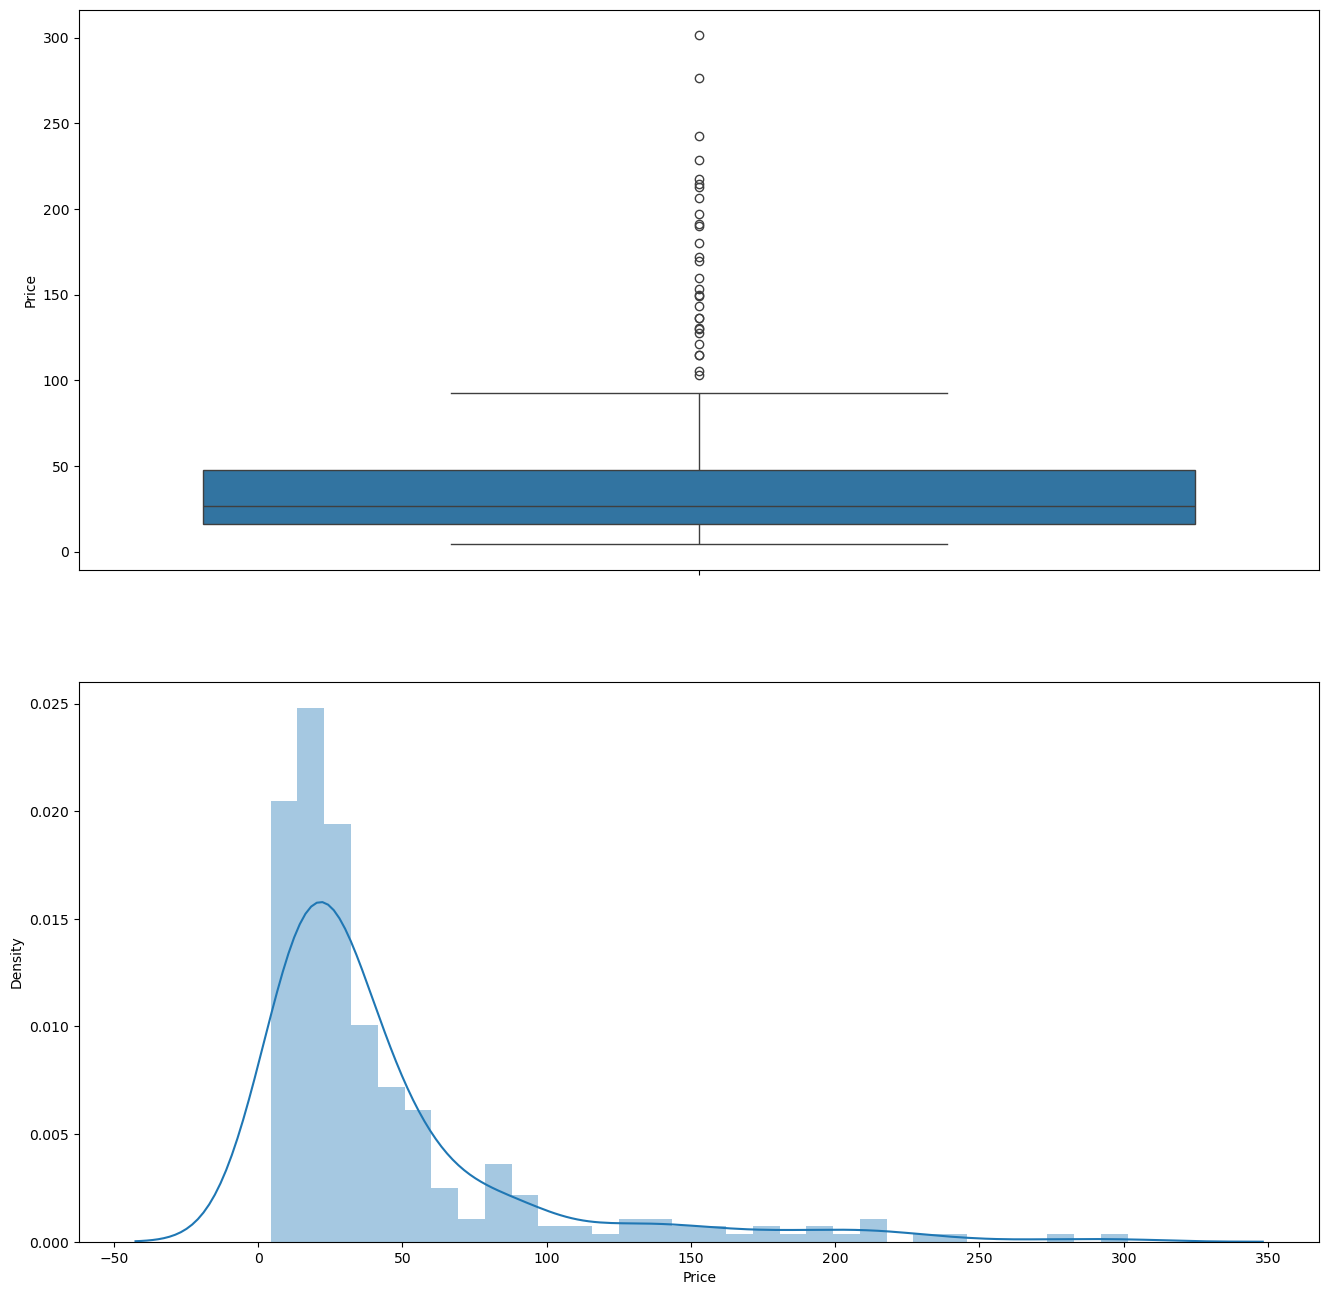

In [184]:
boxHistPlot(df['Price'])

## Data Visuization

### Feature_Set:


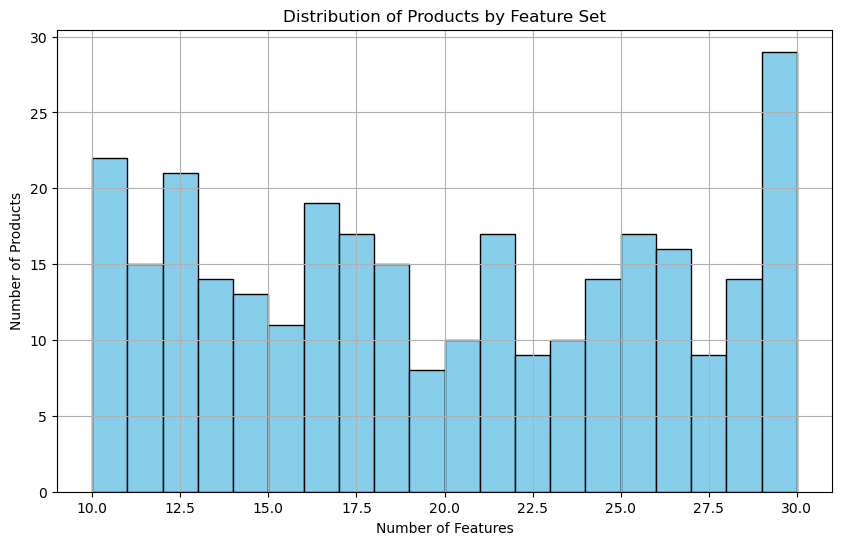

In [264]:
# Histogram for Feature_Set
plt.figure(figsize=(10, 6))
plt.hist(df['Feature_Set'], bins=range(min(df['Feature_Set']), max(df['Feature_Set']) + 1, 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Products by Feature Set')
plt.xlabel('Number of Features')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()


 ### User_base

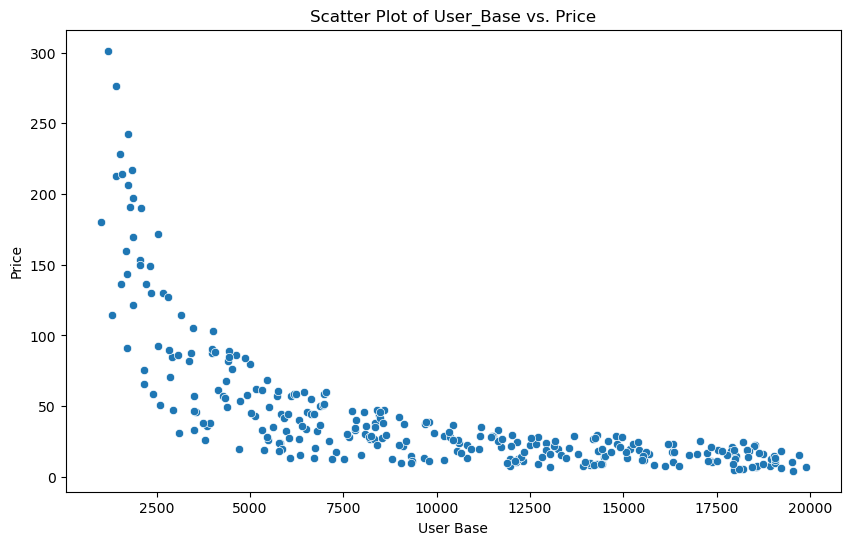

In [265]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='User_Base', y='Price', data=df)
plt.title('Scatter Plot of User_Base vs. Price')
plt.xlabel('User Base')
plt.ylabel('Price')
plt.show()

### Customer_Satisfication


C:\Users\Lenovo-1\anaconda3\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo-1\anaconda3\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo-1\anaconda3\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


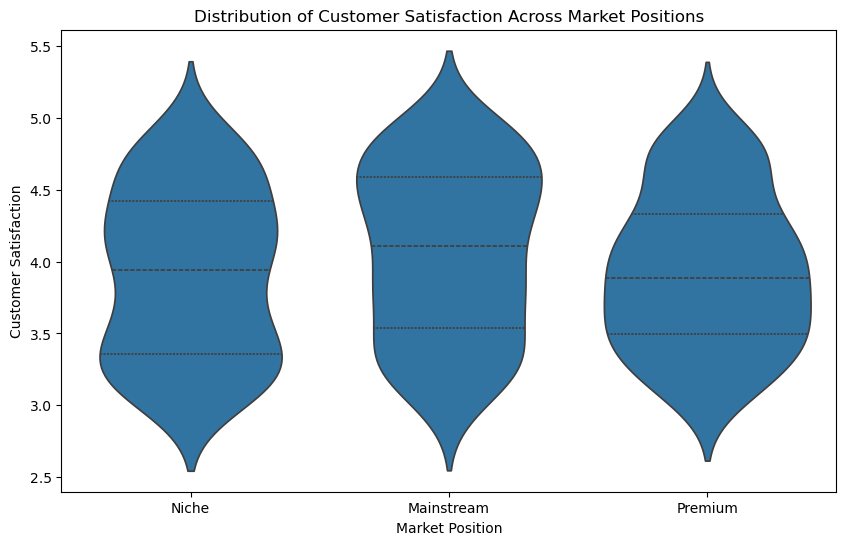

In [266]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Market_Position', y='Customer_Satisfaction', data=df, inner='quartile')
plt.title('Distribution of Customer Satisfaction Across Market Positions')
plt.xlabel('Market Position')
plt.ylabel('Customer Satisfaction')
plt.show()
#1    --->    Niche
#2    --->    Mainstream 
#3    --->    Premium

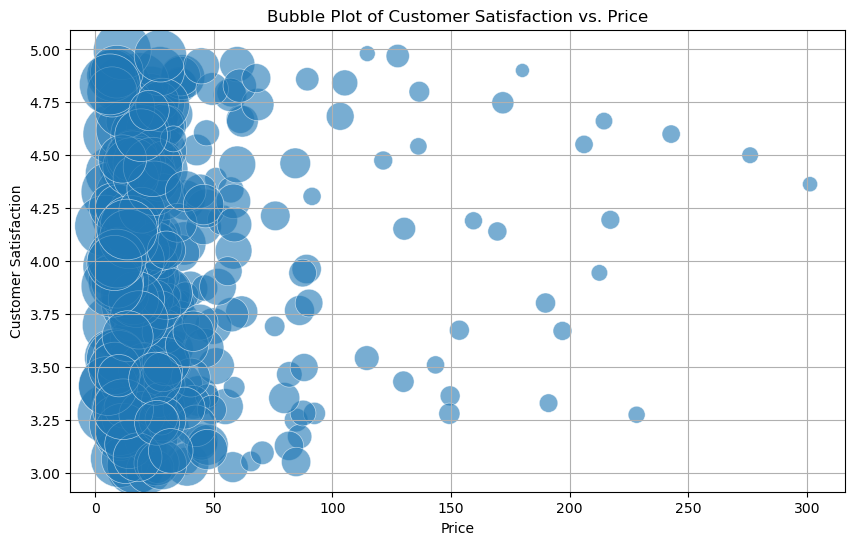

In [267]:
# Bubble Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df['Price'],
    y=df['Customer_Satisfaction'],
    s=df['User_Base'] / 10,  # Scale the bubble size for better visibility
    alpha=0.6,  # Adjust transparency
    edgecolors='w',  # Add white edge to bubbles
    linewidth=0.5
)
plt.title('Bubble Plot of Customer Satisfaction vs. Price')
plt.xlabel('Price')
plt.ylabel('Customer Satisfaction')
plt.grid(True)
plt.show()

### Compitior_Price

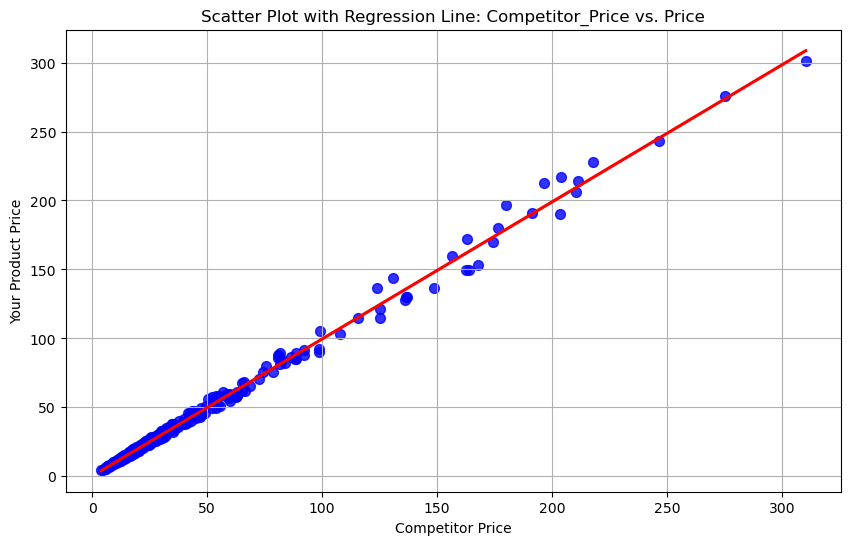

In [268]:
# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='Competitor_Price', y='Price', data=df, ci=None, scatter_kws={"s": 50, "color": "blue"}, line_kws={"color": "red"})

plt.title('Scatter Plot with Regression Line: Competitor_Price vs. Price')
plt.xlabel('Competitor Price')
plt.ylabel('Your Product Price')
plt.grid(True)
plt.show()


### Cost to Develop

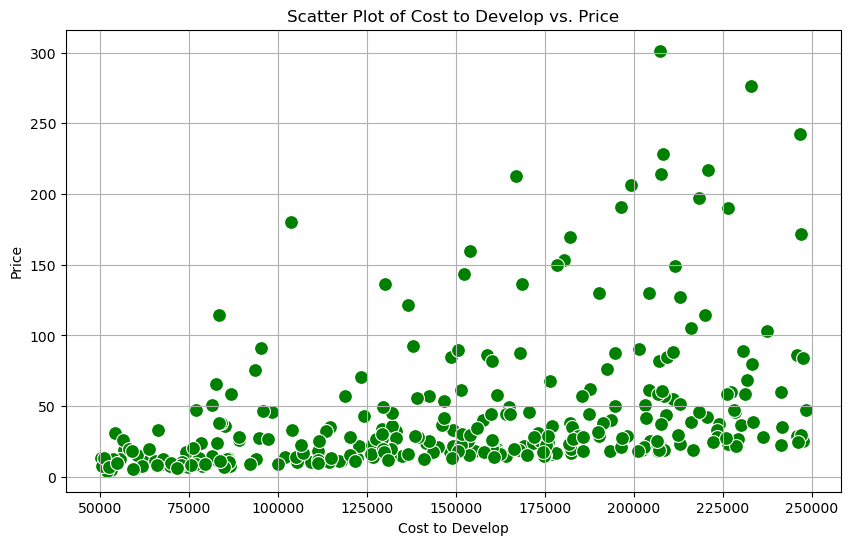

In [269]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost_to_Develop', y='Price', data=df, s=100, color='green')

plt.title('Scatter Plot of Cost to Develop vs. Price')
plt.xlabel('Cost to Develop')
plt.ylabel('Price')
plt.grid(True)
plt.show()


### Buyer Budget

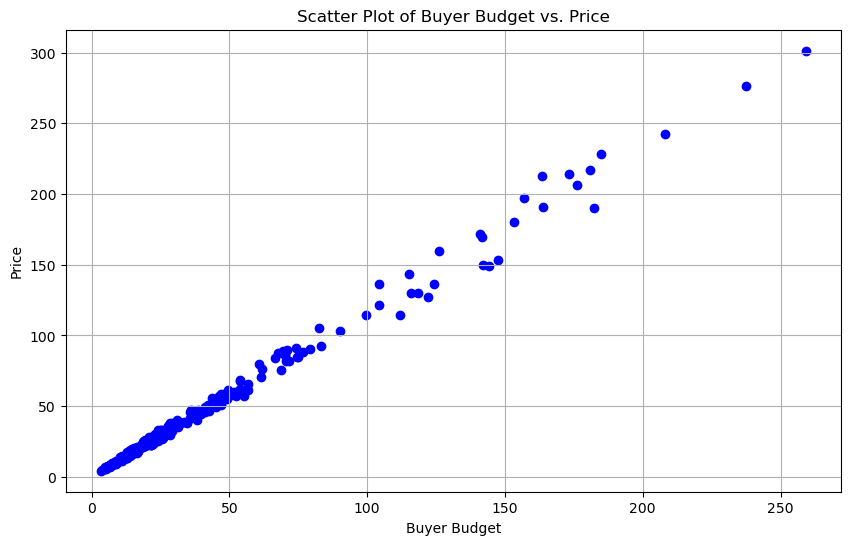

In [270]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Buyer_Budget'], df['Price'], color='blue', marker='o')

plt.title('Scatter Plot of Buyer Budget vs. Price')
plt.xlabel('Buyer Budget')
plt.ylabel('Price')
plt.grid(True)
plt.show()

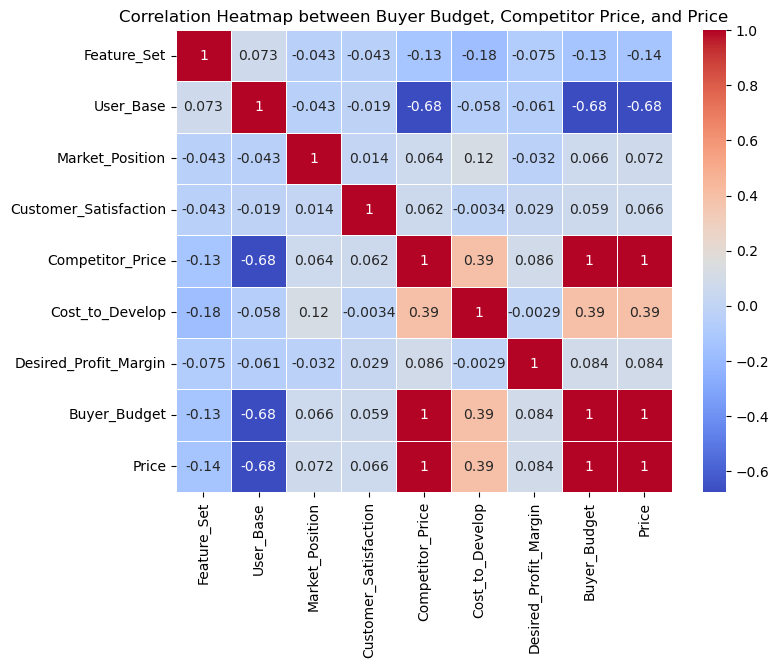

In [275]:
# Heatmap
# Calculate the correlation matrix
df1=df.drop(columns=['Product_ID','Product_Name'])
correlation_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap between Buyer Budget, Competitor Price, and Price')
plt.show()


### Price

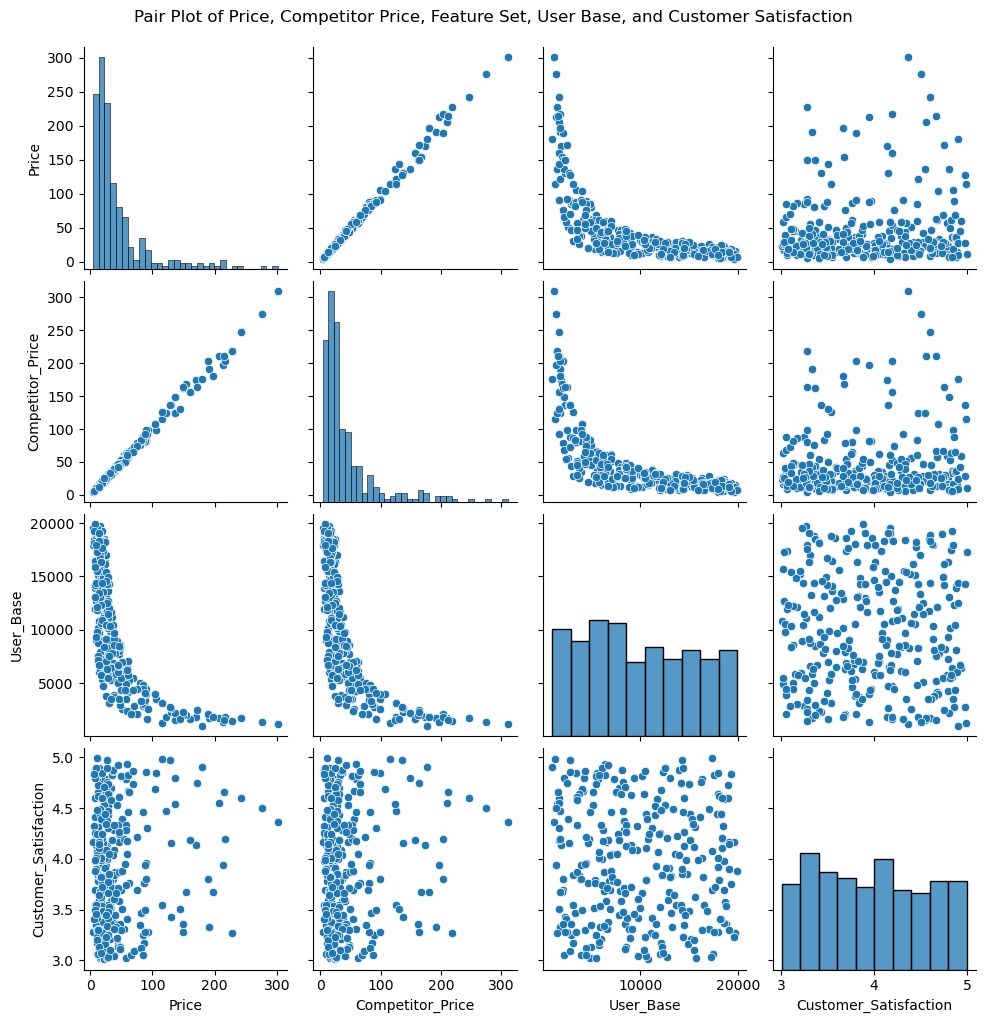

In [193]:

df2 = df[["Price","Competitor_Price","User_Base","Customer_Satisfaction"]]

# Pair Plot
sns.pairplot(df2)
plt.suptitle('Pair Plot of Price, Competitor Price, Feature Set, User Base, and Customer Satisfaction', y=1.02)
plt.show()

## Feature Transformation

In [240]:
# Reset the index to remove duplicate index labels
df = df.reset_index(drop=True)


### Convert Categorial Feature to Numerical Feature 

1    --->    Niche

2    --->    Mainstream 

3    --->    Premium

In [271]:

# Define the order for the 'Market_Position'
market_position_order = {'Niche': 1, 'Mainstream': 2, 'Premium': 3}

# Apply ordinal encoding
df['Market_Position'] = df['Market_Position'].map(market_position_order)


# Save the encoded DataFrame
df.to_csv('saas_pricing_ordinal_encoded.csv', index=False)

# Check the result
print(df["Market_Position"].unique())

[1 2 3]


In [272]:
df["Market_Position"].value_counts()

Market_Position
3    106
1     98
2     96
Name: count, dtype: int64

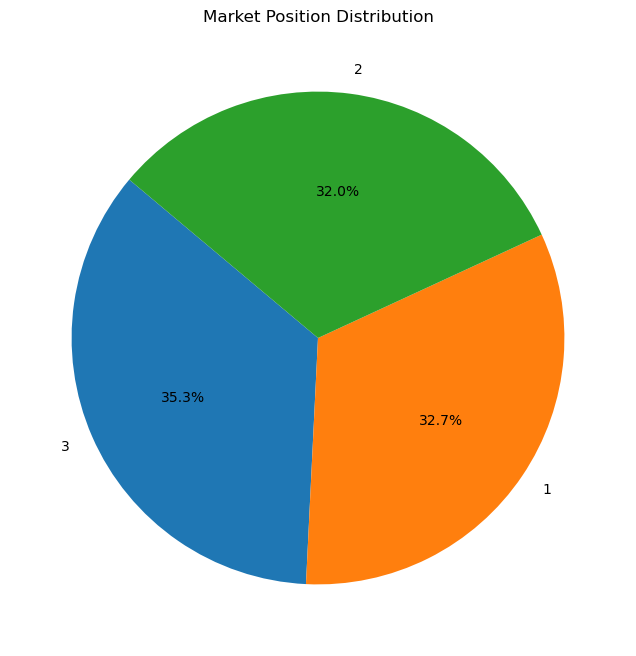

In [246]:
# Calculate the distribution of Market Position
market_position_counts = df['Market_Position'].value_counts()
market_labels = {1: 'Niche', 2: 'Mainstream', 3: 'Premium'}
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_position_counts, labels=market_position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Position Distribution')
plt.show()

C:\Users\Lenovo-1\AppData\Local\Temp\ipykernel_12144\903054586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Market_Position', y='Price', data=avg_price_by_market, palette='viridis')
C:\Users\Lenovo-1\anaconda3\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo-1\anaconda3\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo-1\anaconda

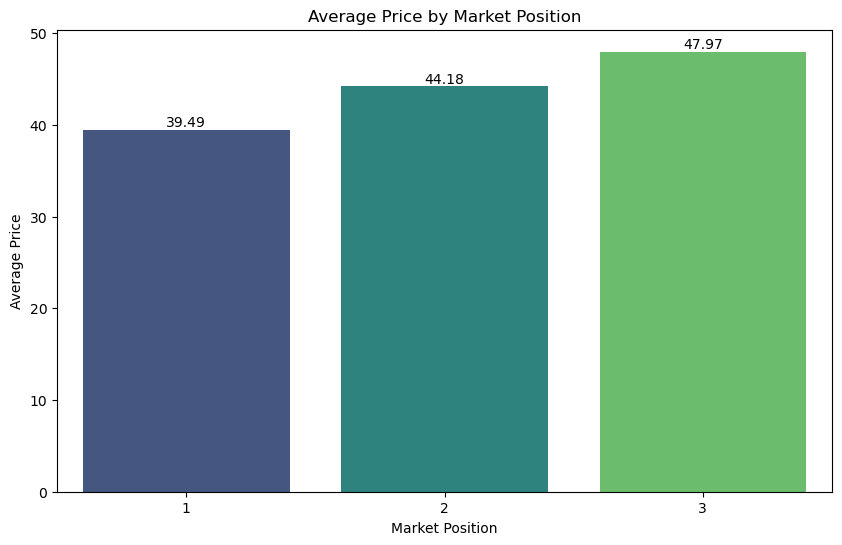

In [198]:
# Calculate the average price for each market position
avg_price_by_market = df.groupby('Market_Position')['Price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Market_Position', y='Price', data=avg_price_by_market, palette='viridis')

# Add numbers on top of each bar
for i in range(len(avg_price_by_market)):
    bar = bars.patches[i]
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

             
plt.title('Average Price by Market Position')
plt.xlabel('Market Position')
plt.ylabel('Average Price')
plt.show()


## Split data for training and testing


In [277]:
from sklearn.model_selection import train_test_split
print(df.head(5))
# Define the features and target variable
X = df.drop(columns=['Price','Product_ID','Product_Name','Feature_Set','Market_Position','Customer_Satisfaction','Desired_Profit_Margin'])
y = df['Price']  # Target: 'Price'
print(X.head(5))
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


  Product_ID Product_Name  Feature_Set  User_Base  Market_Position  \
0       P233  Product_233           10       4141                1   
1       P060   Product_60           15      16338                1   
2       P007    Product_7           16       1301                2   
3       P186  Product_186           10       1728                3   
4       P174  Product_174           16       8357                3   

   Customer_Satisfaction  Competitor_Price  Cost_to_Develop  \
0               4.669860         56.812792           151376   
1               4.787785         25.040816           226572   
2               4.979920        115.728085            83320   
3               4.599832        246.676164           246733   
4               4.287999         35.732004           182130   

   Desired_Profit_Margin  Buyer_Budget       Price  
0               0.673552     49.656010   61.177394  
1               0.684748     21.103281   23.363731  
2               0.791105     99.474866  1

## Scaling

### StandardScaler

In [278]:
sc=StandardScaler()
sc.fit(X_train)
#z=(x-u)/s Formula
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [279]:
X_train[:3,:]

array([[-1.17911484,  0.04427797, -0.97537498,  0.0162639 ],
       [-0.76340098,  0.32563593,  0.60363042,  0.27765621],
       [-0.25749205,  0.01621597,  1.01738201,  0.03222131]])

In [280]:
X_test[:2,:]

array([[-1.08891978,  0.77396901,  0.76494968,  0.7360715 ],
       [-0.25229563, -0.07315416,  0.92019239, -0.03634845]])

In [281]:
print("mean",sc.mean_)
print("no of features",sc.n_features_in_)
print("scale",sc.scale_)
print("var",sc.var_)
print("mean is substracted",sc.with_mean)
print("standard devition is divided",sc.with_std)


mean [9.84245000e+03 4.36879481e+01 1.51270513e+05 3.71406038e+01]
no of features 4
scale [5.38832162e+03 4.86669864e+01 5.67756134e+04 4.15300946e+01]
var [2.90340099e+07 2.36847556e+03 3.22347027e+09 1.72474876e+03]
mean is substracted True
standard devition is divided True


### MinMaxScaler

In [204]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

# x_scaled = (x - min) / (max - min) Formula
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

# Print the properties
print("Data min:", min_max_scaler.data_min_)
print("Data max:", min_max_scaler.data_max_)
print("Feature range:", min_max_scaler.feature_range)
print("Number of features:", min_max_scaler.n_features_in_)


Data min: [-1.48288162 -1.60577831 -1.22415868 -1.70243425 -0.81696491 -1.77874807
 -1.69019782 -0.81028261]
Data max: [1.69756153 1.86431893 1.17419302 1.77115445 5.47788791 1.70988003
 1.73195051 5.34437272]
Feature range: (0, 1)
Number of features: 8


### Robust Scaler

In [205]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)

# x_scaled = (x - Q1) / (Q3 - Q1) Formula
X_train = robust_scaler.transform(X_train)
X_test = robust_scaler.transform(X_test)

# Print the properties
print("Center (median):", robust_scaler.center_)
print("Scale (IQR):", robust_scaler.scale_)
print("Number of features:", robust_scaler.n_features_in_)


Center (median): [0.45       0.42031233 0.5        0.49063547 0.07565319 0.5235423
 0.49760893 0.0753102 ]
Scale (IQR): [0.55       0.46904749 1.         0.50090811 0.09848004 0.52172475
 0.49083615 0.10119009]
Number of features: 8


### MaxAbsScaler

In [206]:
from sklearn.preprocessing import MaxAbsScaler

sc = MaxAbsScaler()
sc.fit(X_train)

# x_scaled = x / max(abs(x)) Formula
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Print the properties
print("Max absolute value:", sc.max_abs_)
print("Number of features:", sc.n_features_in_)


Max absolute value: [1.         1.23588267 0.5        1.01688217 9.38613323 1.00348373
 1.0235413  9.13814548]
Number of features: 8


## Model

In [287]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Elastic Net Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100),
    'XGBoost Regression': xgb.XGBRegressor(n_estimators=100),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, epsilon=0.2)
}


In [288]:
# Function to evaluate models using cross-validation
def test_model(model, X_train, y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = r2_val_score.mean()
    return score

In [289]:
# Training and Evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2_score_cv = test_model(model, X_train, y_train)
    print(f"{name} Mean Squared Error: {mse:.4f}")
    print(f"{name} Cross-Validated R² Score: {r2_score_cv:.4f}\n")

Linear Regression Mean Squared Error: 14.2792
Linear Regression Cross-Validated R² Score: 0.9937

Lasso Regression Mean Squared Error: 14.5330
Lasso Regression Cross-Validated R² Score: 0.9938

Elastic Net Regression Mean Squared Error: 130.2124
Elastic Net Regression Cross-Validated R² Score: 0.9492

Random Forest Regression Mean Squared Error: 15.3601
Random Forest Regression Cross-Validated R² Score: 0.9858

Gradient Boosting Regression Mean Squared Error: 22.1192
Gradient Boosting Regression Cross-Validated R² Score: 0.9842

XGBoost Regression Mean Squared Error: 26.6934
XGBoost Regression Cross-Validated R² Score: 0.9856

Support Vector Regression Mean Squared Error: 1723.6750
Support Vector Regression Cross-Validated R² Score: 0.2774



In [291]:
# Initialize and train the Linear Regression model
best_reg = LinearRegression()
best_reg.fit(X_train, y_train)

# Evaluate on the test set
y_pred_best_reg = best_reg.predict(X_test)
mse_best_reg = mean_squared_error(y_test, y_pred_lin_reg)
print(f"Linear Regression Mean Squared Error on Test Set: {mse_best_reg:.4f}")


Linear Regression Mean Squared Error on Test Set: 14.6883


So We need to go with Linear Regreesion model

In [292]:
# Function to predict price
def predict_price(user_base, competitor_price, cost_to_develop, buyer_budget):
    # Create DataFrame for the input data
    input_data = pd.DataFrame({
        'User_Base': [user_base],
        'Competitor_Price': [competitor_price],
        'Cost_to_Develop': [cost_to_develop],
        'Buyer_Budget': [buyer_budget]
    })

    # Assuming scaler is already fitted on the training data
    input_data_scaled = sc.transform(input_data)

    # Predict the price
    predicted_price = best_reg.predict(input_data_scaled)

    return predicted_price[0]

# Example usage
user_base = 75000
competitor_price = 20.00
cost_to_develop = 175000.00
buyer_budget = 17.00

predicted_price = predict_price(
    user_base,
    competitor_price,
    cost_to_develop,
    buyer_budget,
)

print(f"Predicted Price: ${predicted_price:.2f}")


Predicted Price: $17.86


In [293]:
import joblib

# Save the trained model
joblib.dump(best_reg, 'best_reg_model.pkl')

# Save the scaler used for the model
joblib.dump(sc, 'scaler.pkl')


['scaler.pkl']